In [99]:
import numpy as np
import random as rm
import pandas as pd
import csv
import sys
from sklearn import preprocessing
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [21]:
def getData(fname, dimension):
    # create a new array to store the data
    data = np.empty([0,dimension])
    label = []
    with open(fname, mode ='r')as file:
        # reading the CSV file
        csvFile = csv.reader(file)
        
        # displaying the contents of the CSV file
        for lines in csvFile: 
            data = np.row_stack((data,[float(lines[0]), float(lines[1])]))
            label.append(float(lines[2]))
    label = np.array(label)
    return (data, label)

In [24]:
# Obtain data
xdata1_train, ydata1_train = getData('dataset1_train.csv', 2)
xdata1_test, ydata1_test = getData('dataset1_test.csv', 2)

xdata2_train, ydata2_train = getData('dataset2_train.csv', 2)
xdata2_test, ydata2_test = getData('dataset2_test.csv', 2)

xdata3_train, ydata3_train = getData('dataset3_train.csv',2 )
xdata3_test, ydata3_test = getData('dataset3_test.csv', 2)

## preprocessing
# Standarlize
scaler1_train = preprocessing.StandardScaler().fit(xdata1_train)
scaler2_train = preprocessing.StandardScaler().fit(xdata2_train)
scaler3_train = preprocessing.StandardScaler().fit(xdata3_train)

xdata1_train_scaled = scaler1_train.transform(xdata1_train)
xdata1_test_scaled = scaler1_train.transform(xdata1_test)

xdata2_train_scaled = scaler2_train.transform(xdata2_train)
xdata2_test_scaled = scaler2_train.transform(xdata2_test)

xdata3_train_scaled = scaler3_train.transform(xdata3_train)
xdata3_test_scaled = scaler3_train.transform(xdata3_test)

In [158]:
################################################
## EE559 HW4, Prof. Chugg
################################################

def plotDecBoundaries_Nonlinear(feature, labels, weight, non_linear_trans, predictor, fsize=(6,4),legend_on = False):
    
    '''
    Plot the decision boundaries and data points for any binary classifiers
    
    feature: origianl2D feautre, N x 2 array:
        N: number of data points
        2: number of features 
    labels: class lables correspond to feature, N x 1 array: [0,0,1,1,0,0,...]
        N: number of data points
    legend_on: add the legend in the plot. potentially slower for datasets with large number of clases and data points
    ----------------------------
    You need to write the following two functions

    non_linear_trans: your custom non-linear transforation function.
        <feature_nonlinear> = non_linear_trans(<feature_original>), 
            Input: <feature_original>, Nx2 array, 
            Output: <feature_nonlinear>: Nx? array.
        if no nonlinear transformation performs, then, 
        let non_linear_trans = lambda x:x, which just output your original feature
    
    predictor: your custom predictor.
        <predictions> = predictor(<feature>)
            Input: <feature> Nx? array.
            Output: <predictions> binary labels, i.e., array ([0,1,0,0,1...])

    If you don't want write custom functions, you can modify this plot function based on your need,
    do non-linear transformation and class prediction inside this plot function.
    ----------------------------
    '''

    labels = labels.astype(int)

    # Set the feature range for ploting
    max_x = np.ceil(max(feature[:, 0])) + 1
    min_x = np.floor(min(feature[:, 0])) - 1
    max_y = np.ceil(max(feature[:, 1])) + 1
    min_y = np.floor(min(feature[:, 1])) - 1

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.05

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.
    '''
    You should write the custom functions, non_linear_trans and predictor
    '''
    # apply non-linear transformation to all points in the map (not only data points)
    xy = non_linear_trans(xy)
    # predict the class of all points in the map 
#     pred_label = predictor(xy)
    
    pred_label = predictor(xy, weight)

    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order='F')

    # documemtation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
    symbols_ar = np.array(['rx', 'bo', 'ms', 'cd','gp','y*','kx','gP','r+','bh'])
    #show the image, give each coordinate a color according to its class label
    plt.figure(figsize=fsize)

    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower', aspect='auto')
    
    plt.show()
    
    # plot the class data.
    plot_index = 0
    class_list = []
    class_list_name = [] #for legend
    for cur_label in np.unique(labels):
        # print(cur_label,plot_index,np.sum(label_train == cur_label))
        d1, = plt.plot(feature[labels == cur_label, 0],feature[labels == cur_label, 1], symbols_ar[plot_index])

        if legend_on:
            class_list.append(d1)
            class_list_name.append('Class '+str(plot_index))
            l = plt.legend(class_list,class_list_name, loc=2)
            plt.gca().add_artist(l)
       
        plot_index = plot_index + 1

    plt.show()

In [20]:
################################################
## EE559 HW1, Prof. Jenkins
## Created by Arindam Jati
## Tested in Python 3.6.3, OSX El Capitan, and subsequent versions
################################################

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


def plotDecBoundaries(training, label_train, w):
    # Plot the decision boundaries and data points for perceptron learning classification result
    # training: traning data
    # label_train: class lables correspond to training data
    # w: weight vector
    nclass = max(np.unique(label_train))

    # Set the feature range for ploting
    max_x = np.ceil(max(training[:, 0])) + 1
    min_x = np.floor(min(training[:, 0])) - 1
    max_y = np.ceil(max(training[:, 1])) + 1
    min_y = np.floor(min(training[:, 1])) - 1

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.01

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1] + inc / 100, inc),
                         np.arange(yrange[0], yrange[1] + inc / 100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack((x.reshape(x.shape[0] * x.shape[1], 1, order='F'),
                    y.reshape(y.shape[0] * y.shape[1], 1, order='F')))  # make (x,y) pairs as a bunch of row vectors.

    # distance measure evaluations for each (x,y) pair.
    aug = np.zeros(np.shape(xy)[0]) + 1
    xy_aug = np.concatenate((aug[:, None], xy), axis=1)
    pred_label = np.zeros(np.shape(xy)[0])
    
    for i in range(np.shape(xy)[0]):
        if w.T @ xy_aug[i] > 0:
            pred_label[i] = 1
        else:
            pred_label[i] = 2

    decisionmap = pred_label.reshape(image_size, order='F')

    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')

    # plot the class training data.
    plt.plot(training[label_train == 1, 0], training[label_train == 1, 1], 'rx')
    plt.plot(training[label_train == 2, 0], training[label_train == 2, 1], 'go')

    l = plt.legend(('Class 1', 'Class 2'), loc=2)
    plt.gca().add_artist(l)

    # plot the class mean vector.
    plt.show()

In [50]:
def shuffle(xdata, ydata):
    newX = np.copy(xdata)
    newY = np.copy(ydata)
    N = len(newX)
    shuff = np.random.permutation(N)
    for i in range(N):
        newX[i] = xdata[shuff[i]]
        newY[i] = ydata[shuff[i]]
    return (newX, newY)

In [41]:
def perceptronLearning(data, label, w0, eta = 1, maxEpochs = 100):
    """
    data: (N, D) data array, non-augmented format with labels(1.0, 2.0)
    eta: learning rate (constant)
    maxEpochs: max number of passes through the data.  Halts if reach the max epoch
    """
    
    N, D = data.shape
    wHat = np.copy(w0)
    
    minJ = sys.float_info.max
    finalWHat = np.copy(w0)
    i1 = False
    
    
    for m in range(1, maxEpochs + 1):
        # 1. shuffle
        shuffledData, shuffledLabel = shuffle(data,label)
        
        # 2. Augment and reflected
        z = (-1.0) ** (shuffledLabel + 1)
#         z = shuffledLabel
        dataAug = np.ones((N, D + 1))
        dataAug[:, 1:] = shuffledData
        zData = (dataAug.T * z).T          
        
        for n in range(0, N):
            condition = np.dot(wHat ,zData[n])
            index = (m - 1) * N + n
            
            # compute new J(w) 
            gx_matrix = np.dot(wHat, zData.T)
            gx_matrix = gx_matrix * -1
            loss = np.sum(gx_matrix > 0)
            if( loss < minJ ):
                minJ = loss
                finalWHat = np.copy(wHat)
            
            if(condition <= 0):
                wHat = wHat + eta * zData[n]
        
        if loss == 0:
            print("i1 reach. Data is linearly separable")
            i1 = True
            break
    if(not i1):
        print("i2 reach.")
    print("Weight matrix is:" , finalWHat)
    print("Min J is:" , minJ)

    return finalWHat

In [134]:
def accuracy(data, label, wHat):
    '''
    data: non augment data
    '''
    N, D = data.shape
    z = (-1.0) ** (label + 1)
    wHat = np.copy(wHat)
    dataAug = np.ones((N, D + 1))
    dataAug[:, 1:] = data
    zData = (dataAug.T * z).T

    count = 0
    for i in range(N):
        if np.dot(wHat ,zData[i]) > 0:
            count += 1
    return (count) / N * 100

In [42]:
def linear_classification():
    weight = np.ones(3)
    
    weight1 = perceptronLearning(xdata1_train_scaled, ydata1_train, weight)  

    plotDecBoundaries(xdata1_train_scaled, ydata1_train, weight1)
    acc_train1 = accuracy(xdata1_train_scaled, ydata1_train, weight1)
    print("Accuracy for training data 1 is: ", acc_train1, "%")
    
    plotDecBoundaries(xdata1_test_scaled, ydata1_test, weight1)
    acc_test1 = accuracy(xdata1_test_scaled, ydata1_test, weight1)
    print("Accuracy for testing data 1 is: ", acc_test1, "%")
    

    weight2 = perceptronLearning(xdata2_train_scaled, ydata2_train, weight)

    plotDecBoundaries(xdata2_train_scaled, ydata2_train, weight2)
    acc_train2 = accuracy(xdata2_train_scaled, ydata2_train, weight2)
    print("Accuracy for training data 2 is: ", acc_train2, "%")

    plotDecBoundaries(xdata2_test_scaled, ydata2_test, weight2)
    acc_test2 = accuracy(xdata2_test_scaled, ydata2_test, weight2)
    print("Accuracy for testing data 2 is: ", acc_test2, "%")

    weight3 = perceptronLearning(xdata3_train_scaled, ydata3_train, weight)    

    plotDecBoundaries(xdata3_train_scaled, ydata3_train, weight3)
    acc_train3 = accuracy(xdata3_train_scaled, ydata3_train, weight3)
    print("Accuracy for training data 3 is: ", acc_train3, "%")

    plotDecBoundaries(xdata3_test_scaled, ydata3_test, weight3)
    acc_test3 = accuracy(xdata3_test_scaled, ydata3_test, weight3)
    print("Accuracy for testing data 3 is: ", acc_test3, "%")

i1 reach. Data is linearly separable
Weight matrix is: [ 0.         -2.09552505  2.11386957]
Min J is: 0


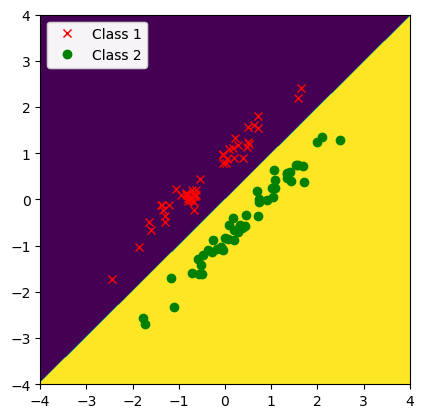

Accuracy for training data 1 is:  100.0 %


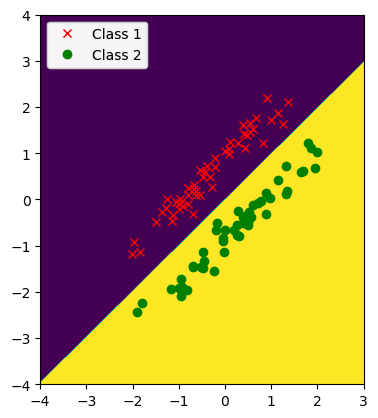

Accuracy for testing data 1 is:  100.0 %
i1 reach. Data is linearly separable
Weight matrix is: [ 0.         -0.58388862  1.55803305]
Min J is: 0


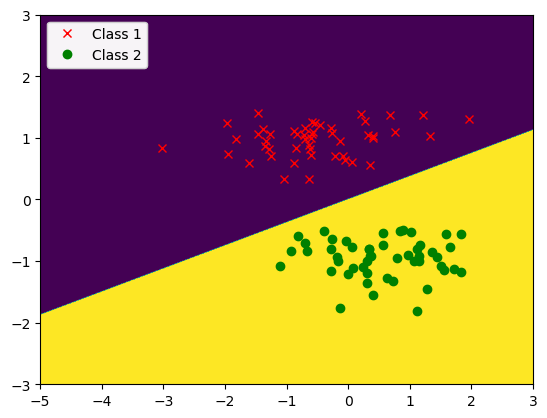

Accuracy for training data 2 is:  100.0 %


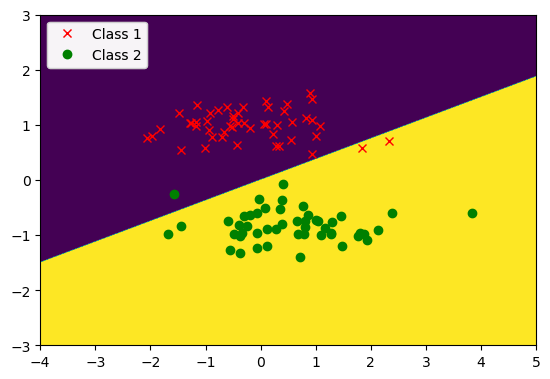

Accuracy for testing data 2 is:  96.96969696969697 %
i2 reach.
Weight matrix is: [ 0.         -0.00949884 -0.05430716]
Min J is: 1.0980766158415043


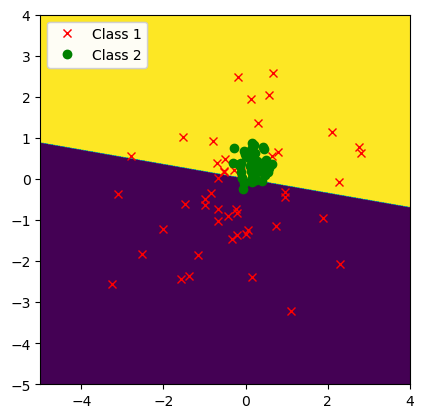

Accuracy for training data 3 is:  74.74747474747475 %


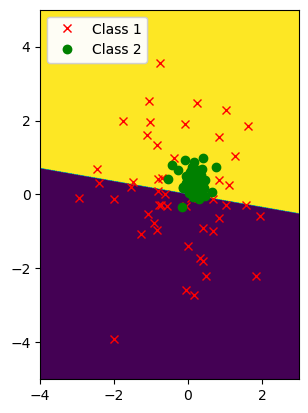

Accuracy for testing data 3 is:  75.75757575757575 %


In [49]:
linear_classification()

In [46]:
def run_10_linear():
    weight = np.ones(3)
    
    accuracy_train1 = np.zeros(10)
    accuracy_test1 = np.zeros(10)
    
    accuracy_train2 = np.zeros(10)
    accuracy_test2 = np.zeros(10)
    
    accuracy_train3 = np.zeros(10)
    accuracy_test3 = np.zeros(10)
    
    for i in range(10):
        
        weight1 = perceptronLearning(xdata1_train_scaled, ydata1_train, weight)  
        accuracy_train1[i] = accuracy(xdata1_train_scaled, ydata1_train, weight1)
        accuracy_test1[i] = accuracy(xdata1_test_scaled, ydata1_test, weight1)

        weight2 = perceptronLearning(xdata2_train_scaled, ydata2_train, weight)

        accuracy_train2[i] = accuracy(xdata2_train_scaled, ydata2_train, weight2)
        accuracy_test2[i] = accuracy(xdata2_test_scaled, ydata2_test, weight2)

        weight3 = perceptronLearning(xdata3_train_scaled, ydata3_train, weight)    

        accuracy_train3[i] = accuracy(xdata3_train_scaled, ydata3_train, weight3)
        accuracy_test3[i] = accuracy(xdata3_test_scaled, ydata3_test, weight3)
        
    print("The mean of accuracy for the training data 1 is :", np.mean(accuracy_train1), "%")    
    print("The mean of accuracy for the testing data 1 is :", np.mean(accuracy_test1), "%")
    print("The std of accuracy for the training data 1 is :", np.std(accuracy_train1))    
    print("The std of accuracy for the testing data 1 is :", np.std(accuracy_test1))
    print("\n")
    print("The mean of accuracy for the training data 2 is :", np.mean(accuracy_train2), "%")    
    print("The mean of accuracy for the testing data 2 is :", np.mean(accuracy_test2), "%")
    print("The std of accuracy for the training data 2 is :", np.std(accuracy_train2))    
    print("The std of accuracy for the testing data 2 is :", np.std(accuracy_test2))
    print("\n")
    print("The mean of accuracy for the training data 3 is :", np.mean(accuracy_train3), "%")    
    print("The mean of accuracy for the testing data 3 is :", np.mean(accuracy_test3), "%")
    print("The std of accuracy for the training data 3 is :", np.std(accuracy_train3))    
    print("The std of accuracy for the testing data 3 is :", np.std(accuracy_test3))

In [47]:
run_10_linear()

i1 reach. Data is linearly separable
Weight matrix is: [ 0.         -3.52481552  3.50225845]
Min J is: 0
Accuracy:  100.0 %
Accuracy:  100.0 %
i1 reach. Data is linearly separable
Weight matrix is: [ 0.         -0.153983    1.91133793]
Min J is: 0
Accuracy:  100.0 %
Accuracy:  100.0 %
i2 reach.
Weight matrix is: [ 0.         -0.03543798  0.02314264]
Min J is: 1.225349059469708
Accuracy:  53.535353535353536 %
Accuracy:  46.464646464646464 %
i1 reach. Data is linearly separable
Weight matrix is: [ 0.         -0.70940556  0.61468782]
Min J is: 0
Accuracy:  100.0 %
Accuracy:  100.0 %
i1 reach. Data is linearly separable
Weight matrix is: [ 1.         -0.00874213  2.01612548]
Min J is: 0
Accuracy:  100.0 %
Accuracy:  94.94949494949495 %
i2 reach.
Weight matrix is: [ 0.          0.01542985 -0.04514293]
Min J is: 0.9244808153892415
Accuracy:  67.67676767676768 %
Accuracy:  67.67676767676768 %
i1 reach. Data is linearly separable
Weight matrix is: [ 0.         -1.82931335  2.21360549]
Min J is

In [46]:
def nonlinear_quadratic_mapping(xdata):
    """
    xdata : nonagument data N * D
    """
    N, D = xdata.shape 
    D_prime = 1/2 * (D ** 2 + 3 * D)
    xdata_mapping = []
    
    # Augment xdata
    xdata_aug = np.ones((N, D + 1))
    xdata_aug[:,1:] = xdata
    
    for i in range(D + 1): 
        for j in range(i, D + 1):
            xdata_mapping.append(xdata_aug[:,i] * xdata_aug[:,j]) 
    
    xdata_mapping = np.array(xdata_mapping).T.reshape(N, int(D_prime) + 1)
    
    return xdata_mapping

In [53]:
def predictor(xdata, weight):
    """
    xdata : augment data N * D_primes + 1 matrix
    weight : augmnet weight D_primes + 1 vector
    """
    gx = np.dot(xdata, weight)
    predict_label = np.ones(len(gx))
    for i in range(len(gx)):
        if gx[i] < 0:
            predict_label[i] += 1
    return predict_label

In [115]:
# Preprocessing: create an initial weight and get the transformed data
N, D = xdata1_train_scaled.shape 
D_prime = 1/2 * (D ** 2 + 3 * D)
weight_prime = np.ones(int(D_prime) + 1)

xdata1_train_mapping = nonlinear_quadratic_mapping(xdata1_train_scaled)
xdata1_test_mapping = nonlinear_quadratic_mapping(xdata1_test_scaled)

xdata2_train_mapping = nonlinear_quadratic_mapping(xdata2_train_scaled)
xdata2_test_mapping = nonlinear_quadratic_mapping(xdata2_test_scaled)

xdata3_train_mapping = nonlinear_quadratic_mapping(xdata3_train_scaled)
xdata3_test_mapping = nonlinear_quadratic_mapping(xdata3_test_scaled)

i1 reach. Data is linearly separable
Weight matrix is: [  2.         -14.75720494  12.00561919   0.10838697  -0.4354391
  -0.26564149]
Min J is: 0
[[1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]
 ...
 [1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]]


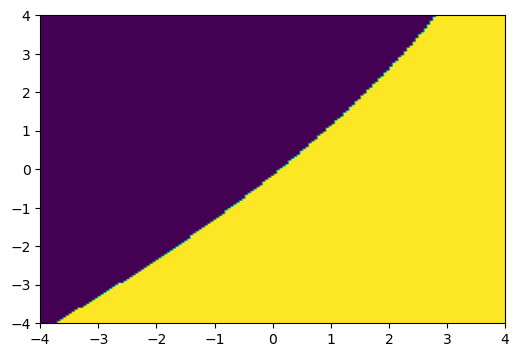

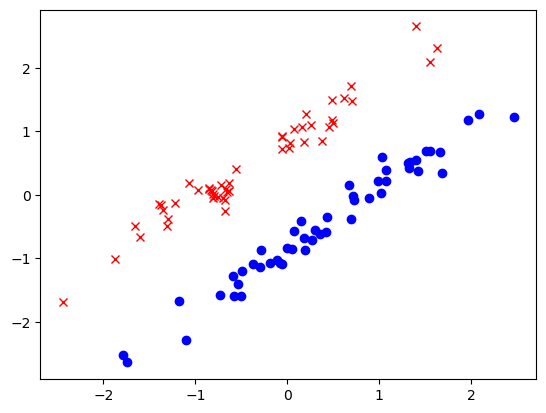

Accuracy rate for training data 1 : 100.0 %
[[1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]
 ...
 [1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]]


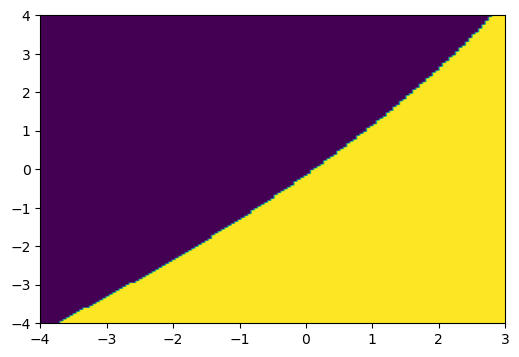

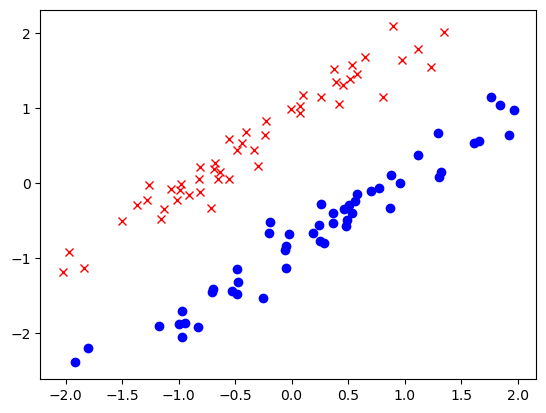

Accuracy rate for testing data 1 : 100.0 %


i1 reach. Data is linearly separable
Weight matrix is: [ 0.         -2.56612443  7.3351172   2.38312801  0.14571009  0.81104179]
Min J is: 0
[[1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


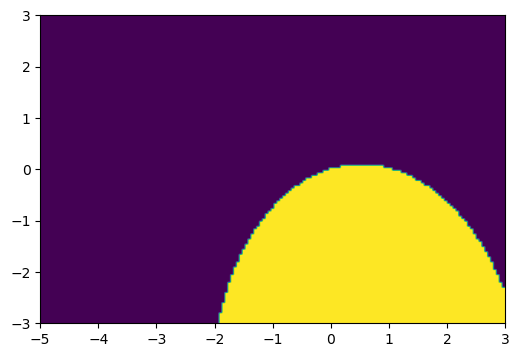

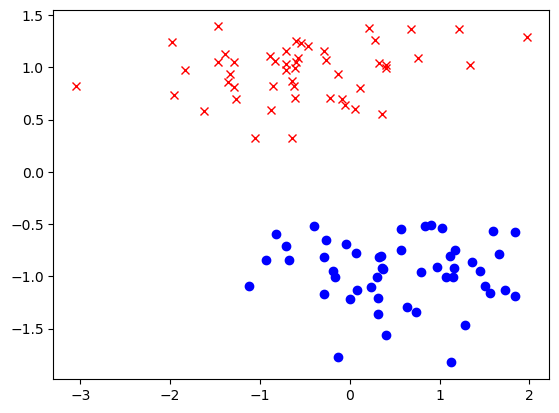

Accuracy rate for training data 2 : 100.0 %
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


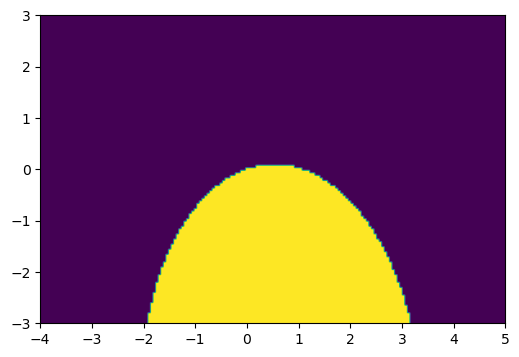

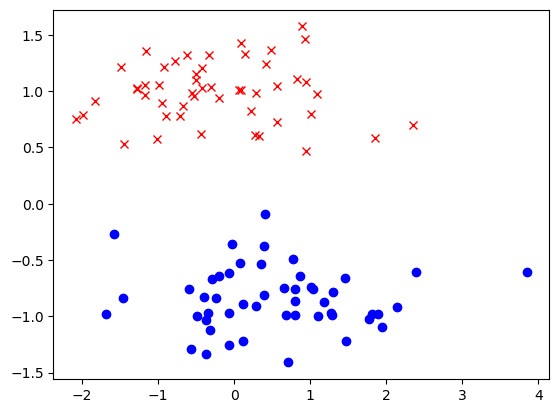

Accuracy rate for testing data 2 : 95.0 %


i2 reach.
Weight matrix is: [-1.         -3.75335871 -1.68337766  6.42657523  2.60908785  2.37696263]
Min J is: 2
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


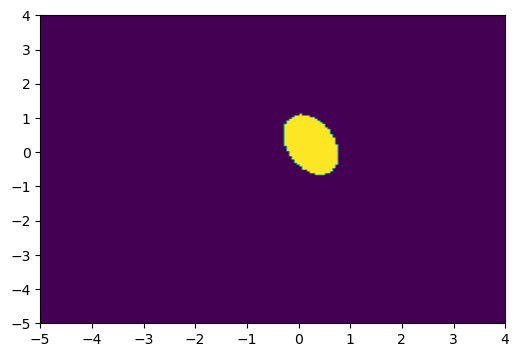

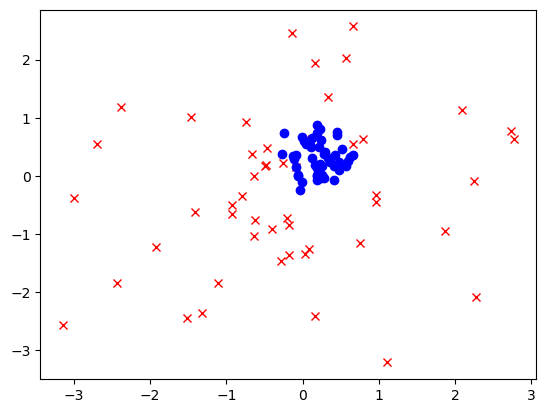

Accuracy rate for training data 3 : 98.0 %
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


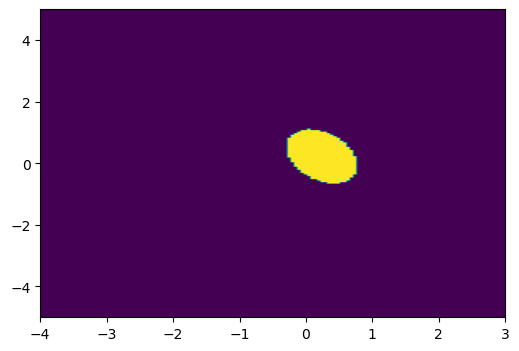

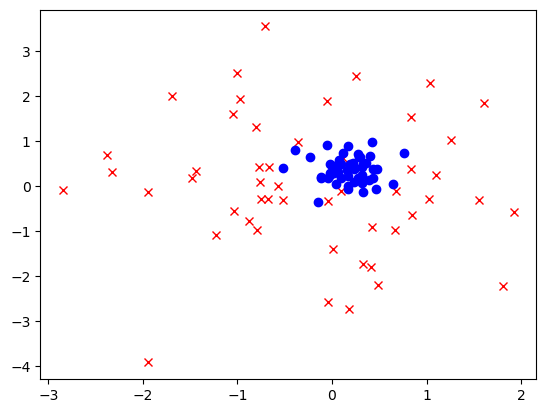

Accuracy rate for testing data 2 : 92.0 %


In [159]:
def quadratic_classfication():
    weight_prime_1 = perceptronLearning(xdata1_train_mapping[:,1:], ydata1_train, weight_prime) 
    plotDecBoundaries_Nonlinear(xdata1_train_scaled, ydata1_train, weight_prime_1, nonlinear_quadratic_mapping,predictor)
    print("Accuracy rate for training data 1 :",accuracy(xdata1_train_mapping[:,1:], ydata1_train, weight_prime_1), "%")
    
    plotDecBoundaries_Nonlinear(xdata1_test_scaled, ydata1_test, weight_prime_1, nonlinear_quadratic_mapping,predictor)
    print("Accuracy rate for testing data 1 :",accuracy(xdata1_test_mapping[:,1:], ydata1_test, weight_prime_1), "%")
    print("\n")
    
    weight_prime_2 = perceptronLearning(xdata2_train_mapping[:,1:], ydata2_train, weight_prime)
    plotDecBoundaries_Nonlinear(xdata2_train_scaled, ydata2_train, weight_prime_2, nonlinear_quadratic_mapping,predictor)
    print("Accuracy rate for training data 2 :",accuracy(xdata2_train_mapping[:,1:], ydata2_train, weight_prime_2), "%")
    
    plotDecBoundaries_Nonlinear(xdata2_test_scaled, ydata2_test, weight_prime_2, nonlinear_quadratic_mapping,predictor)
    print("Accuracy rate for testing data 2 :",accuracy(xdata2_test_mapping[:,1:], ydata2_test, weight_prime_2), "%")
    print("\n")
    
    weight_prime_3 = perceptronLearning(xdata3_train_mapping[:,1:], ydata3_train, weight_prime)
    plotDecBoundaries_Nonlinear(xdata3_train_scaled, ydata3_train, weight_prime_3, nonlinear_quadratic_mapping,predictor)
    print("Accuracy rate for training data 3 :", accuracy(xdata3_train_mapping[:,1:], ydata3_train, weight_prime_3), "%")
    
    plotDecBoundaries_Nonlinear(xdata3_test_scaled, ydata3_test, weight_prime_3, nonlinear_quadratic_mapping,predictor)
    print("Accuracy rate for testing data 2 :",accuracy(xdata3_test_mapping[:,1:], ydata3_test, weight_prime_3), "%")
    
quadratic_classfication()

In [151]:
def run_10_quadratic():
    
    accuracy_train1 = np.zeros(10)
    accuracy_test1 = np.zeros(10)
    
    accuracy_train2 = np.zeros(10)
    accuracy_test2 = np.zeros(10)
    
    accuracy_train3 = np.zeros(10)
    accuracy_test3 = np.zeros(10)
    
    for i in range(10):
        weight_prime_1 = perceptronLearning(xdata1_train_mapping[:,1:], ydata1_train, weight_prime) 
        weight_prime_2 = perceptronLearning(xdata2_train_mapping[:,1:], ydata2_train, weight_prime)
        weight_prime_3 = perceptronLearning(xdata3_train_mapping[:,1:], ydata3_train, weight_prime)
        
        
        accuracy_train1[i] = accuracy(xdata1_train_mapping[:,1:], ydata1_train, weight_prime_1)
        accuracy_test1[i] = accuracy(xdata1_test_mapping[:,1:], ydata1_test, weight_prime_1)
    
        accuracy_train2[i] = accuracy(xdata2_train_mapping[:,1:], ydata2_train, weight_prime_2)
        accuracy_test2[i] = accuracy(xdata2_test_mapping[:,1:], ydata2_test, weight_prime_2)

    
        accuracy_train3[i] = accuracy(xdata3_train_mapping[:,1:], ydata3_train, weight_prime_3)
        accuracy_test3[i] = accuracy(xdata3_test_mapping[:,1:], ydata3_test, weight_prime_3)
    
        
    print("The mean of accuracy for the training data 1 is :", np.mean(accuracy_train1), "%")    
    print("The mean of accuracy for the testing data 1 is :", np.mean(accuracy_test1), "%")
    print("The std of accuracy for the training data 1 is :", np.std(accuracy_train1))    
    print("The std of accuracy for the testing data 1 is :", np.std(accuracy_test1))
    print("\n")
    print("The mean of accuracy for the training data 2 is :", np.mean(accuracy_train2), "%")    
    print("The mean of accuracy for the testing data 2 is :", np.mean(accuracy_test2), "%")
    print("The std of accuracy for the training data 2 is :", np.std(accuracy_train2))    
    print("The std of accuracy for the testing data 2 is :", np.std(accuracy_test2))
    print("\n")
    print("The mean of accuracy for the training data 3 is :", np.mean(accuracy_train3), "%")    
    print("The mean of accuracy for the testing data 3 is :", np.mean(accuracy_test3), "%")
    print("The std of accuracy for the training data 3 is :", np.std(accuracy_train3))    
    print("The std of accuracy for the testing data 3 is :", np.std(accuracy_test3))
    
run_10_quadratic()

i1 reach. Data is linearly separable
Weight matrix is: [ -2.         -14.37311012  13.15115425   1.63934042   1.76400355
  -1.6091564 ]
Min J is: 0
i1 reach. Data is linearly separable
Weight matrix is: [-1.         -1.12933732  8.36800763 -0.61211116  1.35499821  0.73636262]
Min J is: 0
i2 reach.
Weight matrix is: [-1.         -3.4761001  -1.45441152  6.59679023  2.31566287  2.15822252]
Min J is: 2
i1 reach. Data is linearly separable
Weight matrix is: [  2.         -14.15847923  14.66324413   1.22354825  -0.046896
   0.4798287 ]
Min J is: 0
i1 reach. Data is linearly separable
Weight matrix is: [ 0.         -1.61757337  5.627948    1.48937733  0.60085165 -2.34590643]
Min J is: 0
i2 reach.
Weight matrix is: [-1.         -4.19888817 -2.37571506  7.47137138  3.37030289  2.47273643]
Min J is: 2
i1 reach. Data is linearly separable
Weight matrix is: [ -1.         -10.17791242   9.71769867  -1.75130274   0.66391675
   1.3751295 ]
Min J is: 0
i1 reach. Data is linearly separable
Weight matr

In [140]:
def nonlinear_cubic_mapping(xdata):
    """
    xdata : nonagument data N * D
    """
    N, D = xdata.shape 
    D_prime = 9
    xdata_mapping = []
    
    # Augment xdata
    xdata_aug = np.ones((N, D + 1))
    xdata_aug[:,1:] = xdata
    
    for i in range(D + 1): 
        for j in range(i, D + 1):
            for k in range(j, D + 1):
                xdata_mapping.append(xdata_aug[:,i] * xdata_aug[:,j] * xdata_aug[:,k]) 
    
    xdata_mapping = np.array(xdata_mapping).T.reshape(N, D_prime + 1)
    return xdata_mapping

In [145]:
xdata1_train_mapping_cubic = nonlinear_cubic_mapping(xdata1_train_scaled)
xdata1_test_mapping_cubic = nonlinear_cubic_mapping(xdata1_test_scaled)

xdata2_train_mapping_cubic = nonlinear_cubic_mapping(xdata2_train_scaled)
xdata2_test_mapping_cubic = nonlinear_cubic_mapping(xdata2_test_scaled)

xdata3_train_mapping_cubic = nonlinear_cubic_mapping(xdata3_train_scaled)
xdata3_test_mapping_cubic = nonlinear_cubic_mapping(xdata3_test_scaled)

weight_prime_cubic = np.ones(10)

i1 reach. Data is linearly separable
Weight matrix is: [ 0.         -1.61543874  1.24146949 -0.28421054  0.65143742 -0.0449748
 -5.97039289 -0.67180192  0.92055614  2.10049763]
Min J is: 0


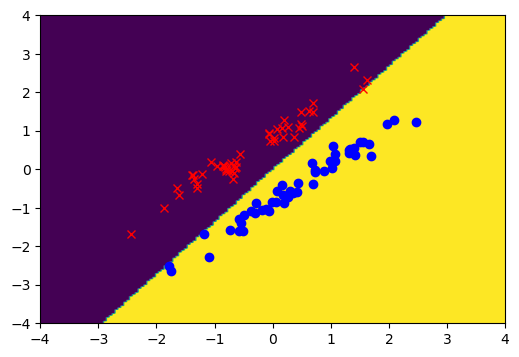

Accuracy rate for training data 1 : 100.0 %


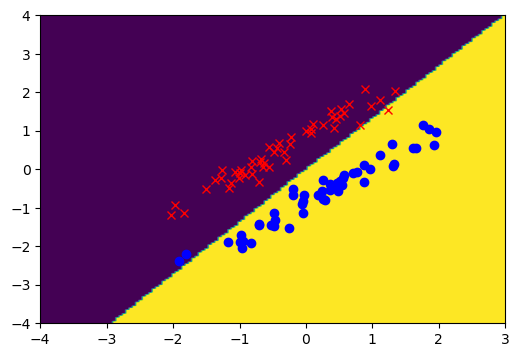

Accuracy rate for testing data 1 : 97.0 %


i1 reach. Data is linearly separable
Weight matrix is: [ 0.         -0.21279609  3.29674302  3.02243026 -0.14617657 -0.16473553
 -2.91061976  2.98469536  0.49709636  2.56366838]
Min J is: 0


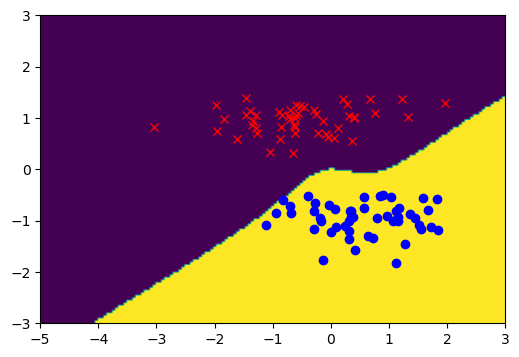

Accuracy rate for training data 2 : 100.0 %


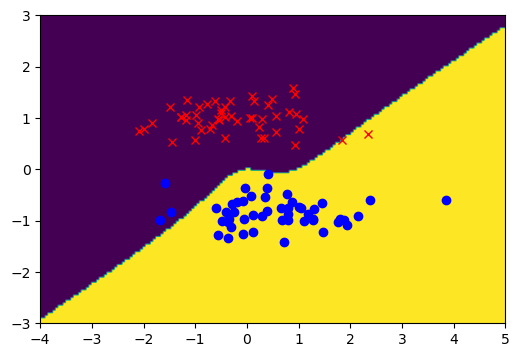

Accuracy rate for testing data 2 : 95.0 %


i2 reach.
Weight matrix is: [ -4.         -15.39150474 -13.2885659   40.41485695  13.15847859
  21.44429684  -4.17019256 -18.59555545  -3.22875261  -4.12572051]
Min J is: 3


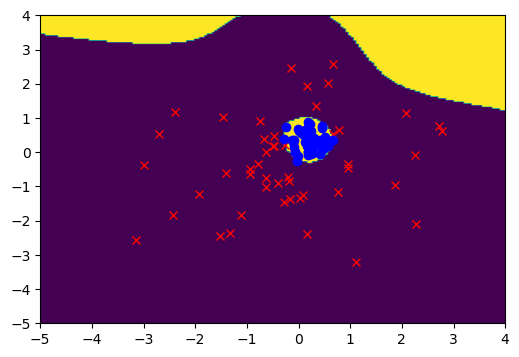

Accuracy rate for training data 3 : 97.0 %


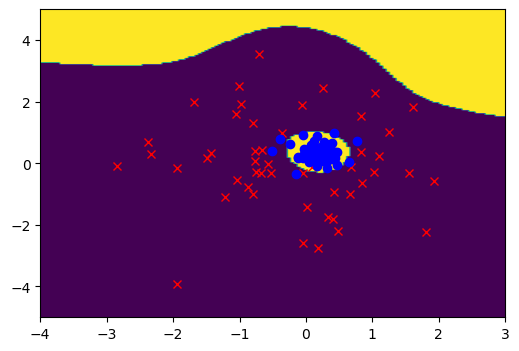

Accuracy rate for testing data 2 : 92.0 %


In [147]:
def cubic_classfication():
    weight_prime_1 = perceptronLearning(xdata1_train_mapping_cubic[:,1:], ydata1_train, weight_prime_cubic) 
    plotDecBoundaries_Nonlinear(xdata1_train_scaled, ydata1_train, weight_prime_1, nonlinear_cubic_mapping,predictor)
    print("Accuracy rate for training data 1 :",accuracy(xdata1_train_mapping_cubic[:,1:], ydata1_train, weight_prime_1), "%")
    
    plotDecBoundaries_Nonlinear(xdata1_test_scaled, ydata1_test, weight_prime_1, nonlinear_cubic_mapping,predictor)
    print("Accuracy rate for testing data 1 :",accuracy(xdata1_test_mapping_cubic[:,1:], ydata1_test, weight_prime_1), "%")
    print("\n")
    
    weight_prime_2 = perceptronLearning(xdata2_train_mapping_cubic[:,1:], ydata2_train, weight_prime_cubic)
    plotDecBoundaries_Nonlinear(xdata2_train_scaled, ydata2_train, weight_prime_2, nonlinear_cubic_mapping,predictor)
    print("Accuracy rate for training data 2 :",accuracy(xdata2_train_mapping_cubic[:,1:], ydata2_train, weight_prime_2), "%")
    
    plotDecBoundaries_Nonlinear(xdata2_test_scaled, ydata2_test, weight_prime_2, nonlinear_cubic_mapping,predictor)
    print("Accuracy rate for testing data 2 :",accuracy(xdata2_test_mapping_cubic[:,1:], ydata2_test, weight_prime_2), "%")
    print("\n")
    
    weight_prime_3 = perceptronLearning(xdata3_train_mapping_cubic[:,1:], ydata3_train, weight_prime_cubic)
    plotDecBoundaries_Nonlinear(xdata3_train_scaled, ydata3_train, weight_prime_3, nonlinear_cubic_mapping,predictor)
    print("Accuracy rate for training data 3 :", accuracy(xdata3_train_mapping_cubic[:,1:], ydata3_train, weight_prime_3), "%")
    
    plotDecBoundaries_Nonlinear(xdata3_test_scaled, ydata3_test, weight_prime_3, nonlinear_cubic_mapping,predictor)
    print("Accuracy rate for testing data 2 :",accuracy(xdata3_test_mapping_cubic[:,1:], ydata3_test, weight_prime_3), "%")
    
cubic_classfication()

In [152]:
def run_10_cubic():
    
    accuracy_train1 = np.zeros(10)
    accuracy_test1 = np.zeros(10)
    
    accuracy_train2 = np.zeros(10)
    accuracy_test2 = np.zeros(10)
    
    accuracy_train3 = np.zeros(10)
    accuracy_test3 = np.zeros(10)
    
    for i in range(10):
        weight_prime_1 = perceptronLearning(xdata1_train_mapping_cubic[:,1:], ydata1_train, weight_prime_cubic) 
        weight_prime_2 = perceptronLearning(xdata2_train_mapping_cubic[:,1:], ydata2_train, weight_prime_cubic)
        weight_prime_3 = perceptronLearning(xdata3_train_mapping_cubic[:,1:], ydata3_train, weight_prime_cubic)
        
        
        accuracy_train1[i] = accuracy(xdata1_train_mapping_cubic[:,1:], ydata1_train, weight_prime_1)
        accuracy_test1[i] = accuracy(xdata1_test_mapping_cubic[:,1:], ydata1_test, weight_prime_1)
    
        accuracy_train2[i] = accuracy(xdata2_train_mapping_cubic[:,1:], ydata2_train, weight_prime_2)
        accuracy_test2[i] = accuracy(xdata2_test_mapping_cubic[:,1:], ydata2_test, weight_prime_2)

    
        accuracy_train3[i] = accuracy(xdata3_train_mapping_cubic[:,1:], ydata3_train, weight_prime_3)
        accuracy_test3[i] = accuracy(xdata3_test_mapping_cubic[:,1:], ydata3_test, weight_prime_3)
    
        
    print("The mean of accuracy for the training data 1 is :", np.mean(accuracy_train1), "%")    
    print("The mean of accuracy for the testing data 1 is :", np.mean(accuracy_test1), "%")
    print("The std of accuracy for the training data 1 is :", np.std(accuracy_train1))    
    print("The std of accuracy for the testing data 1 is :", np.std(accuracy_test1))
    print("\n")
    print("The mean of accuracy for the training data 2 is :", np.mean(accuracy_train2), "%")    
    print("The mean of accuracy for the testing data 2 is :", np.mean(accuracy_test2), "%")
    print("The std of accuracy for the training data 2 is :", np.std(accuracy_train2))    
    print("The std of accuracy for the testing data 2 is :", np.std(accuracy_test2))
    print("\n")
    print("The mean of accuracy for the training data 3 is :", np.mean(accuracy_train3), "%")    
    print("The mean of accuracy for the testing data 3 is :", np.mean(accuracy_test3), "%")
    print("The std of accuracy for the training data 3 is :", np.std(accuracy_train3))    
    print("The std of accuracy for the testing data 3 is :", np.std(accuracy_test3))
    
run_10_cubic()

i1 reach. Data is linearly separable
Weight matrix is: [-1.         -3.19325329  2.39589446 -1.20055382  3.36119949  4.26498433
 -7.05501674  2.54994615  6.39661089 10.34622777]
Min J is: 0
i1 reach. Data is linearly separable
Weight matrix is: [ -1.           3.6313337    8.19029064  12.32073      1.19744872
   2.39701627 -16.04666591  18.19329743   5.41832681   8.56590471]
Min J is: 0
i2 reach.
Weight matrix is: [-3.         -8.46960358 -7.13806135 20.50116809  0.26687748 13.19159749
  0.60849901 -4.36401562  7.03271722 -2.80559863]
Min J is: 3
i1 reach. Data is linearly separable
Weight matrix is: [  2.          -5.64921969   0.56262001   5.31905921   0.95184137
  -2.21272912 -19.66778651  -5.53423642   3.67571804  11.93683492]
Min J is: 0
i1 reach. Data is linearly separable
Weight matrix is: [ 0.         -0.55750747  2.1550173  -1.42582952  2.79894808 -0.33406497
 -2.77824761  3.80187508 -1.07781616  2.54086813]
Min J is: 0
i2 reach.
Weight matrix is: [ -4.         -15.91808354  -